In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('data/case_study_data.csv')

In [4]:
df.head()

,complaint_id,product_group,text
0,2815595,bank_service,On XX/XX/2017 my check # XXXX was debited from...
1,2217937,bank_service,I opened a Bank of the the West account. The a...
2,2657456,bank_service,wells fargo in nj opened a business account wi...
3,1414106,bank_service,A hold was placed on my saving account ( XXXX ...
4,1999158,bank_service,Dear CFPB : I need to send a major concern/com...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268359 entries, 0 to 268358
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   complaint_id   268359 non-null  int64 
 1   product_group  268359 non-null  object
 2   text           268359 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.1+ MB


In [8]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268359 entries, 0 to 268358
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   complaint_id   268359 non-null  int64 
 1   product_group  268359 non-null  object
 2   text           268359 non-null  object
dtypes: int64(1), object(2)
memory usage: 8.2+ MB


In [20]:
df.groupby(['product_group'])['complaint_id'].count().sort_values(ascending = False)

product_group
credit_reporting    81230
debt_collection     61457
mortgage            40279
loan                31035
credit_card         29553
bank_service        20071
money_transfers      4734
Name: complaint_id, dtype: int64

In [31]:
def plot_count(df, feature, title='', size=2):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    total = float(len(df))
    sns.countplot(df[feature],order = df[feature].value_counts().index, palette='Set2')
    plt.title(title)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center")
    plt.xticks(rotation='vertical')
    plt.show()

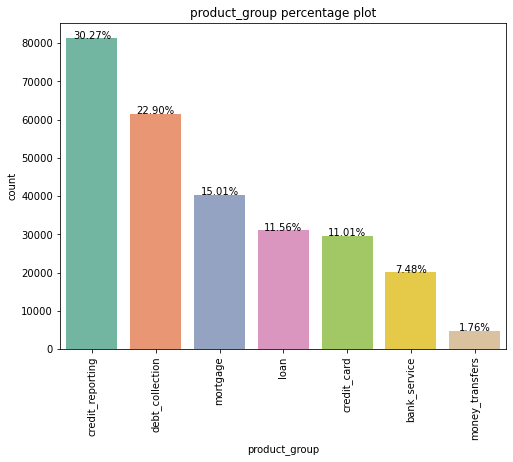

In [32]:
plot_count(df = df, feature='product_group', title = 'product_group percentage plot')

In [33]:
groups = df.groupby(['product_group']).groups

In [37]:
for group in groups:
    print(group, ': ', df.loc[df.product_group == group].iloc[0].text)
    print('='*100)

bank_service :  On XX/XX/2017 my check # XXXX was debited from my checking account, and this check wasn't cashed by XXXX XXXX XXXX, I requested a copy of the endorsement of whom the fund was credited to, Bank of America can't give me satisfactory answer, since this contractor breach of contract that I needed proof of payment in court.
credit_card :  I HAVE HAD AN ACCOUNT WITH DISCOVER CARD SINCE 2011. I HAVE PAID THEM AS AGREED MONTHLY EVER SINCE. HOWEVER, NOW THEY HAVE DECIDED THAT THEY WILL NOT GRANT ME CREDIT ANY LONGER? I HAVE NOW AN AVAILABLE CREDIT LIMIT OF SOME {$1500.00}. THEY REFUSE TO ALLOW ME TO USE THIS ACCOUNT? I AM VERY ANGRY ABOUT THIS TO SAY THE LEAST!
credit_reporting :  I disputed three inaccurate 30 day late payments on my credit report directly to Experian. I submitted all documentation by certified mail on  XXXX   XXXX ,   XXXX   to Experian including : record of my payment due date (  XXXX  each month {$840.00} ) along with printouts of my Bank Statements, verifyi